# Stable Diffusion Depth-to-Image: How to run inference on the endpoint you have created?

Importing relevant packages for querying endpoint and image visualization

In [2]:
import boto3
import matplotlib.pyplot as plt
from IPython.core.display import HTML
import numpy as np
import json
import base64
from PIL import Image
from io import BytesIO

### Download input image
***
We start by downloading the input image to guide the stable diffusion depth to image model. 
***

In [8]:
region = boto3.Session().region_name
# s3_bucket = f"jumpstart-cache-prod-{region}"
# key_prefix = "model-metadata/assets"
# input_img_file_name = "room.jpg"

# s3 = boto3.client("s3")
# s3.download_file(s3_bucket, f"{key_prefix}/{input_img_file_name}", input_img_file_name)

In [6]:
input_img_file_name = "depth-to-image-1.png"

In [7]:
HTML(f'<table><tr><td> <img src="{input_img_file_name}" alt="dog" style="height: 700px;"/> <figcaption>Input Image</figcaption>'
     '</td></tr></table>')

Input Image


### Query endpoint

***
Next, we query the endpoint to generate an image with same depth perception as the input image. You can put in any image and prompt that you like. 
***

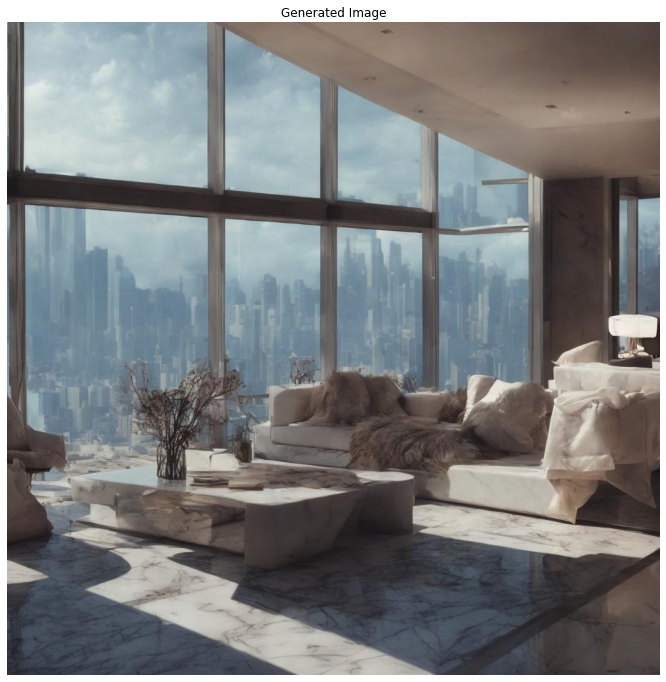

In [22]:
endpoint_name = 'jumpstart-dft-sd-2-depth-fp16'

def encode_img(img_name):
    with open(img_name,'rb') as f:
        img_bytes = f.read()
    encoded_img = base64.b64encode(bytearray(img_bytes)).decode()
    return encoded_img

encoded_input_image = encode_img(input_img_file_name)


payload = { "prompt":"city view, marble floor, minimalist lifestyle", "image": encoded_input_image, "num_inference_steps":50, "guidance_scale":7.5, "seed": 1234}

def query_endpoint(payload):
    """query the endpoint with the json payload encoded in utf-8 format."""
    encoded_payload = json.dumps(payload).encode('utf-8')
    client = boto3.client('runtime.sagemaker')
    response = client.invoke_endpoint(EndpointName=endpoint_name, ContentType='application/json', Accept = 'application/json', Body=encoded_payload)
    return response

def display_image(img, title):
    plt.figure(figsize=(12,12))
    plt.imshow(np.array(img))
    plt.axis('off')
    plt.title(title)
    plt.show()

def parse_and_display_response(query_response):
    """Parse the endpoint response and display the generated images"""
    
    response_dict = json.loads(query_response['Body'].read())
    generated_images = response_dict['generated_images']
    
    for generated_image in generated_images:
        with BytesIO(base64.b64decode(generated_image.encode())) as generated_image_decoded:
            with Image.open(generated_image_decoded) as generated_image_np:
                generated_image_rgb = generated_image_np.convert("RGB")
                generated_image_rgb.save("depth-to-image-2.png")              
                display_image(generated_image_rgb, "Generated Image")

query_response = query_endpoint(payload)
parse_and_display_response(query_response)

In [24]:
input_img_file_name_3 = "depth-to-image-3.png"

In [25]:
HTML(f'<table><tr><td> <img src="{input_img_file_name_3}" alt="dog" style="height: 700px;"/> <figcaption>Input Image</figcaption>'
     '</td></tr></table>')

Input Image


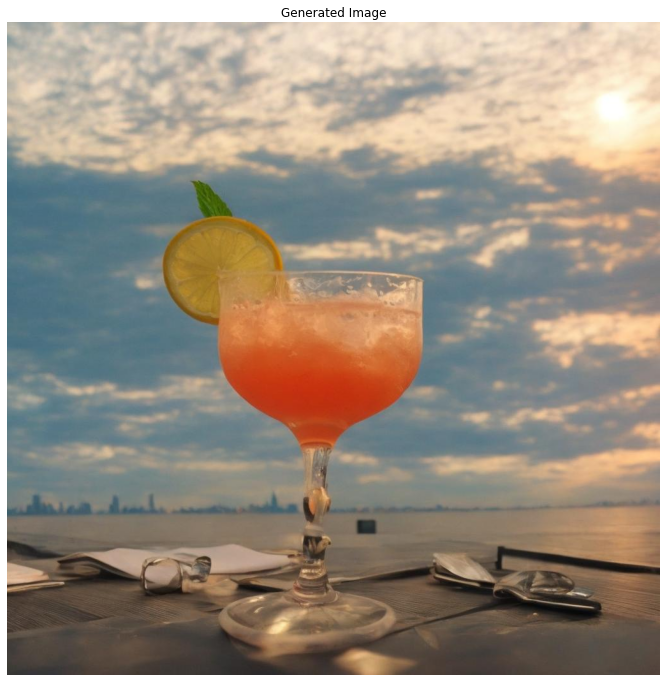

In [28]:
endpoint_name = 'jumpstart-dft-sd-2-depth-fp16'

def encode_img(img_name):
    with open(img_name,'rb') as f:
        img_bytes = f.read()
    encoded_img = base64.b64encode(bytearray(img_bytes)).decode()
    return encoded_img

encoded_input_image = encode_img(input_img_file_name_3)


payload = { "prompt":"nyc rooftop bar", "image": encoded_input_image, "num_inference_steps":50, "guidance_scale":7.5, "seed": 1234}

def query_endpoint(payload):
    """query the endpoint with the json payload encoded in utf-8 format."""
    encoded_payload = json.dumps(payload).encode('utf-8')
    client = boto3.client('runtime.sagemaker')
    response = client.invoke_endpoint(EndpointName=endpoint_name, ContentType='application/json', Accept = 'application/json', Body=encoded_payload)
    return response

def display_image(img, title):
    plt.figure(figsize=(12,12))
    plt.imshow(np.array(img))
    plt.axis('off')
    plt.title(title)
    plt.show()

def parse_and_display_response(query_response):
    """Parse the endpoint response and display the generated images"""
    
    response_dict = json.loads(query_response['Body'].read())
    generated_images = response_dict['generated_images']
    
    for generated_image in generated_images:
        with BytesIO(base64.b64decode(generated_image.encode())) as generated_image_decoded:
            with Image.open(generated_image_decoded) as generated_image_np:
                generated_image_rgb = generated_image_np.convert("RGB")
                generated_image_rgb.save("depth-to-image-4.png")              
                display_image(generated_image_rgb, "Generated Image")

query_response = query_endpoint(payload)
parse_and_display_response(query_response)

### Supported parameters

***
This model supports many parameters while performing inference. They include:

* **prompt**: prompt to guide the image generation. Must be specified and can be a string or a list of strings.
* **image**: The original image.
* **num_inference_steps**  (optional): number of denoising steps during image generation. More steps lead to higher quality image. If specified, it must a positive integer.
* **guidance_scale**  (optional): higher guidance scale results in image closely related to the prompt, at the expense of image quality. If specified, it must be a float. guidance_scale<=1 is ignored.
* **negative_prompt** (optional): guide image generation against this prompt. If specified, it must be a string or a list of strings and used with guidance_scale. If guidance_scale is disabled, this is also disabled. Moreover, if prompt is a list of strings then negative_prompt must also be a list of strings.
* **num_images_per_prompt**  (optional): number of images returned per prompt. If specified it must be a positive integer.
* **seed**: fix the randomized state for reproducibility. If specified, it must be an integer.
* **batch_size** (optional): Number of images to generate in a single forward pass. If using a smaller instance or generating many images, please reduce batch_size to be a small number (1-2). Number of images = number of prompts*num_images_per_prompt.
* **strength** (optional): Amount of noise to add the original image initially. If specified, it must be between 0 and 1. If strength is 1, maximum noise will be added to the input image before denoising process starts and it effectively ignores the input image except the depth map. If strength is 0, no noise is added to the input image before the denoising process starts.
* **scheduler** (optional): Scheduler (also known as sampler) to use during the de-noising process. It controls the tradeoff between de-noising speed and de-noising quality. You are encouraged to try different schedulers to figure out which works best for your purpose. If specified, it must be from the following list [`PNDMScheduler`, `EulerAncestralDiscreteScheduler`, `KDPM2AncestralDiscreteScheduler`, `UniPCMultistepScheduler`, `DEISMultistepScheduler`, `DDIMScheduler`, `KDPM2DiscreteScheduler`, `EulerDiscreteScheduler`, `HeunDiscreteScheduler`, `DPMSolverMultistepScheduler`, `DPMSolverSinglestepScheduler`, `LMSDiscreteScheduler`, `DDPMScheduler`]. Note that once you change the scheduler, all subsequent inference calls will use that scheduler. You can change the scheduler again by setting different value for the scheduler. To learn more, please see [this documentation](https://huggingface.co/docs/diffusers/using-diffusers/schedulers) and the [blog post](https://stable-diffusion-art.com/samplers/).

***

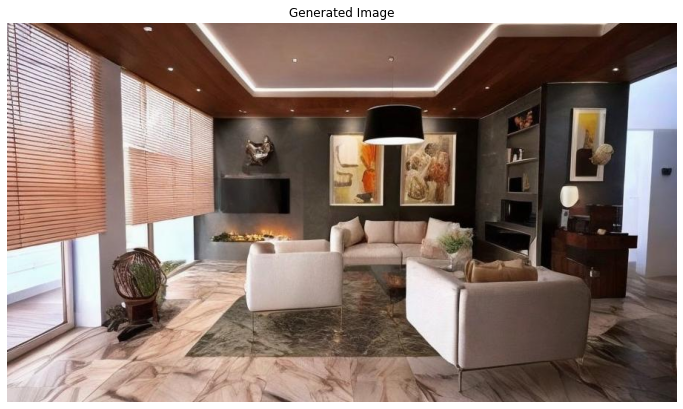

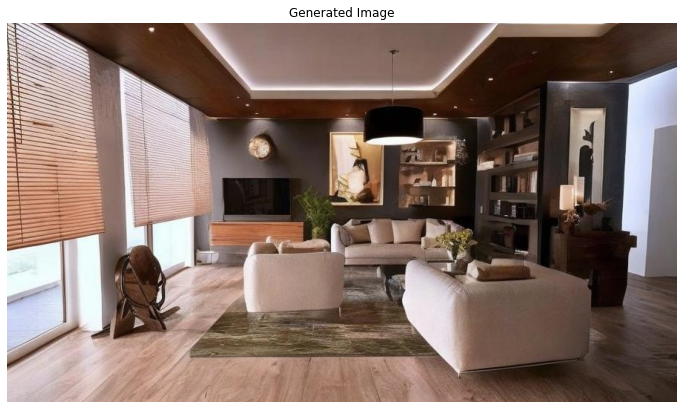

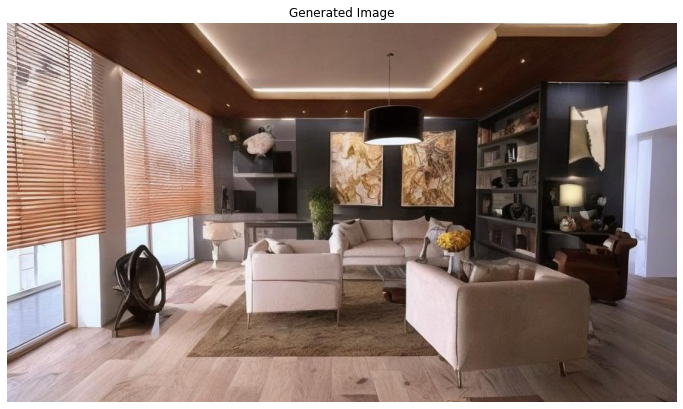

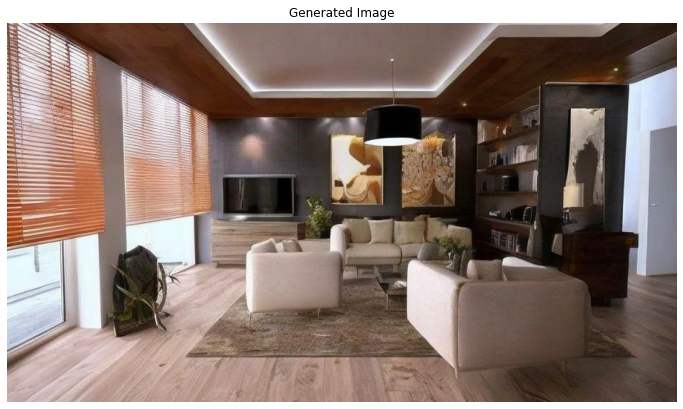

In [5]:
payload = { 
    "prompt":"European style, marble floor, minimalist lifestyle, nature and wood, magical house",
    "image":encoded_input_image,
    "num_inference_steps":30,
    "guidance_scale":7.5,
    "negative_prompt":"poor quality",
    "num_images_per_prompt":4,
    "seed": 1,
    "batch_size":2,
    "strength":0.5,
    "scheduler": "DDIMScheduler"
}
query_response = query_endpoint(payload)
parse_and_display_response(query_response)